In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import webbrowser

In [ ]:
model_path = '/content/drive/MyDrive/emotiondetector.h5'
model = load_model(model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [ ]:
label = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [ ]:
label_mapping = {
    'angry': 'energetic',
    'disgust': 'energetic',
    'fear': 'chill',
    'happy': 'cheerful',
    'neutral': 'chill',
    'sad': 'romantic',
    'surprise': 'cheerful'
}
labels = list(label_mapping.keys())


In [ ]:
def ef(image_path):

    img = load_img(image_path, color_mode='grayscale', target_size=(48, 48))
    feature = img_to_array(img)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0

In [ ]:
image_path = '/content/drive/MyDrive/sad.jpg'
img = ef(image_path)

In [ ]:
pred = model.predict(img)
pred_label = label[pred.argmax()]
pred_mood = label_mapping[pred_label]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


In [ ]:
print("Model prediction is:", pred_label)


Model prediction is: sad


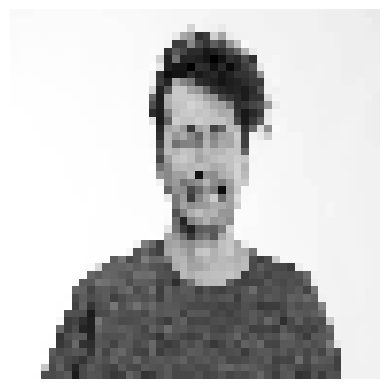

In [ ]:
plt.imshow(img.reshape(48, 48), cmap='gray')
plt.axis('off')
plt.show()